# Comparison of Dimensionality Reduction Techniques on Iris Dataset 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# import the iris dataset
iris_dataset = datasets.load_iris()
X = iris_dataset.data  # we only take the first two features.
y = iris_dataset.target
target_names = iris_dataset.target_names


### Import the Iris dataset

In [102]:
# import the iris dataset
iris_dataset = datasets.load_iris()
X = iris_dataset.data 
y = iris_dataset.target
target_names = iris_dataset.target_names

### Present Iris dataset as a dataframe

In [103]:
iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_df['Species']=iris_dataset['target']
iris_df['Species']=iris_df['Species'].apply(lambda x: iris_dataset['target_names'][x])

print('Shape: {}'.format(iris_df.shape))
print('Target classes: {}'.format(iris_df.Species.unique()))

iris_df.head()

Shape: (150, 5)
Target classes: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Show how classes are separated regarding different featueres

In [104]:
colors = {'Setosa':'#FCEE0C','Versicolor':'#FC8E72','Virginica':'#FC3DC9'}

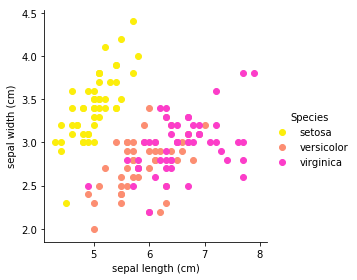

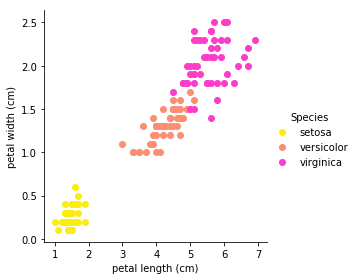

In [105]:
#Let see how the classes are separated regarding different featueres

sns.FacetGrid(iris_df, hue="Species", height=4, palette=colors.values()) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()


sns.FacetGrid(iris_df, hue= "Species", height=4, palette=colors.values()).\
map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()
plt.show()

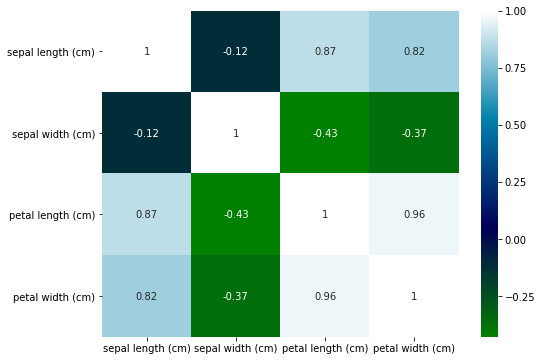

In [106]:
plt.figure(figsize=(8,6))
cor = iris_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.ocean)
plt.show()

### Normalize the features

In [107]:
#Use standard scaler to normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# PCA With 2 Components

explained variance ratio (first two components): [0.72962445 0.22850762]


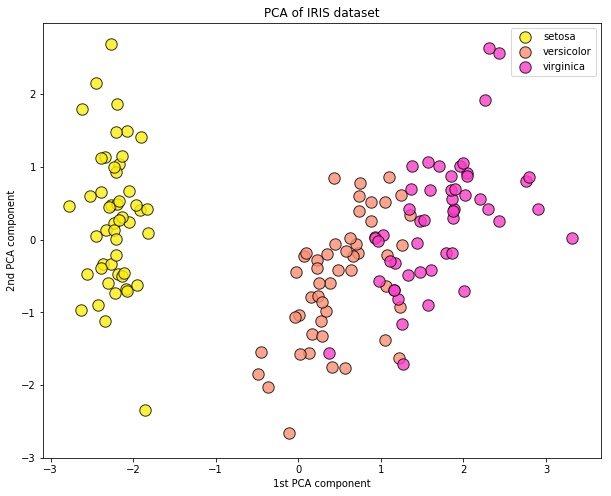

In [108]:
fig = plt.figure(1, figsize=(10, 8))
pca2 = PCA(n_components=2)
X_r = pca2.fit_transform(X)

for color, i, target_name in zip(colors.values(), [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, 
                label=target_name, s=130, edgecolors='k')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.title('PCA of IRIS dataset')

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' # First two PCA components capture 0.9776852*100% of total variation!
      % str(pca2.explained_variance_ratio_))

plt.show()

# PCA With 3 Components

explained variance ratio (first three components): [0.92461872 0.05306648 0.01710261]


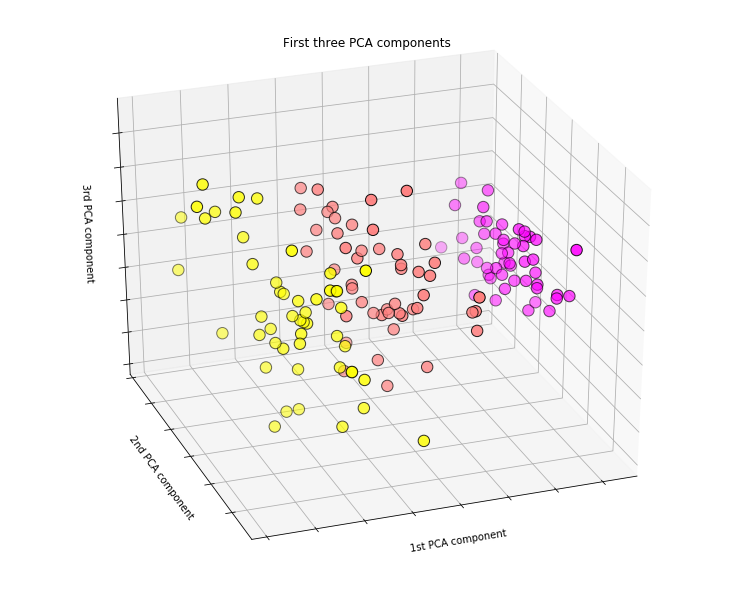

In [109]:
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=110)
pca3 = PCA(n_components=3)

X_reduced = pca3.fit_transform(iris_dataset.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.spring, edgecolor='k', s=130)
ax.set_title("First three PCA components")
ax.set_xlabel("1st PCA component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd PCA component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd PCA component")
ax.w_zaxis.set_ticklabels([])

# Percentage of variance explained for each components
print('explained variance ratio (first three components): {}' # First three PCA components capture 0.99478781 of total variation!
      .format(pca3.explained_variance_ratio_))

plt.show()

# LDA with 2 components

Explained variance ratio (first two linear discriminants): [0.9912126 0.0087874]


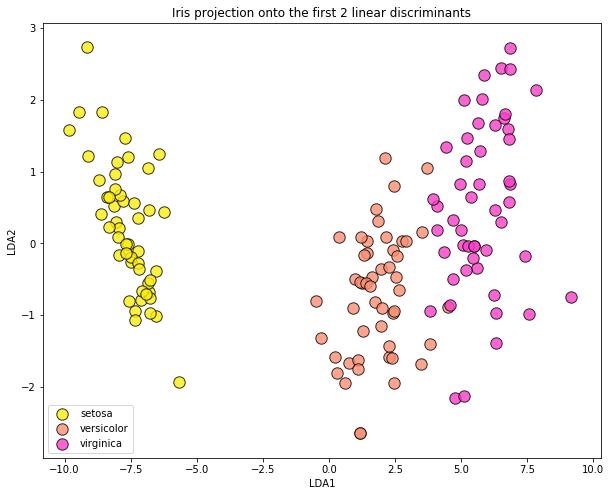

In [110]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_r2 = lda.transform(X)
plt.figure(figsize=(10,8))
for color, i, target_name in zip(colors.values(), [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name,  s=130, edgecolors='k')
plt.legend(loc=3, shadow=False, scatterpoints=1)
plt.xlabel('LDA1')
plt.ylabel('LDA2')           

plt.title('Iris projection onto the first 2 linear discriminants')

print('Explained variance ratio (first two linear discriminants): {}'.format(lda.explained_variance_ratio_))
plt.show()

# t-SNE

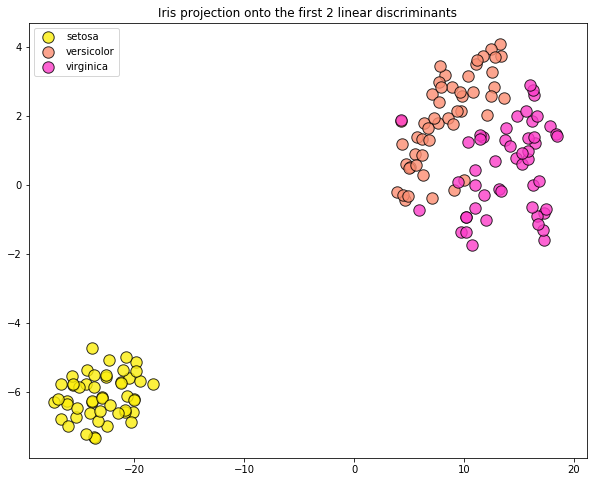

In [111]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

figure = plt.figure
figure(figsize=(10, 8))

for color, i, target_name in zip(colors.values(), [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], alpha=.8, color=color,
                label=target_name,  s=130, edgecolors='k')
plt.legend(loc='best', shadow=False, scatterpoints=1)
           
plt.title('Iris projection onto the first 2 linear discriminants')
plt.show()